# [Module 2] Analyzing GOES/EXIS/XRS data

### Useful Links

[https://www.ngdc.noaa.gov/stp/satellite/goes-r.html](https://www.ngdc.noaa.gov/stp/satellite/goes-r.html)

## Technicalities $\Large{🛑}$

#### Importing required libraries

In [1]:
import numpy as np
import netCDF4 as nc
import requests
import matplotlib
import matplotlib.pyplot as plt
import cftime
import datetime
import os
import wget
import glob
import pandas as pd

#### Defining style parameters for plots

In [2]:
params = {'axes.labelsize'  : 13,
          'xtick.labelsize' : 12,
          'ytick.labelsize' : 12,
          'font.family'     : 'DejaVu serif',
          'font.serif'      : "Laro"
         }

matplotlib.rcParams.update(params)

#### Specifying path to the working directory

In [3]:
main_dir = 'C:/Users/priya/Work/TA duty/SS4202 Spring 2024/GOES_EXIS_XRS/'

#### Downloading data files

In [6]:
%%time

XRS_data_parent_dir = 'https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes18/l2/data/xrsf-l2-flx1s_science/'

event_list = ['20231230', '20231231', '20240101', '20240102']

for i in event_list:
    wget.download(XRS_data_parent_dir + i[0 : 4] + '/' + i[4 : 6] + '/sci_xrsf-l2-flx1s_g18_d' + str(i) + '_v2-2-0.nc', out = main_dir + 'data/')

100% [..........................................................................] 4899857 / 4899857CPU times: total: 1.34 s
Wall time: 2min 50s


In [ ]:
# filename = wget.download('https://data.ngdc.noaa.gov/platforms/solar-space-observing-satellites/goes/goes18/l2/data/xrsf-l2-flx1s_science/2023/12/sci_xrsf-l2-flx1s_g18_d20231230_v2-2-0.nc')

#### Fetching files from the data directory

In [4]:
files = glob.glob(main_dir + 'data/*')

## Extracting information from .nc files $\Large{🛑}$

#### Extracting time values at which observations were made

In [5]:
df = []

for i in files:
    df.append(nc.Dataset(i))

    
date_time = []

for i in df:
    date_time.append(cftime.num2pydate(i.variables['time'], i['time'].units))

#### Extracting GOES Long channel X-ray flux corresponding to the observation time values

In [6]:
GOES_long = []

for i in df:
    GOES_long.append(i.variables['xrsb_flux'][:].tolist())

##### Some useful commands to explore

In [11]:
# print(df.variables['time'][:])
# df.variables.keys()
# df.variables['xrsa_flux'][:]
# df.variables['xrsa_flux'].units
# df.variables['time'].units

## Visualilzation $\Large{🛑}$

#### Plotting the X-ray flux vs time for 1 day (one .nc data fiile )

In [7]:
date_time[0][np.linspace(0, 86399, 5, dtype = int)]

masked_array(data=[real_datetime(2023, 12, 30, 0, 0, 0, 314312),
                   real_datetime(2023, 12, 30, 5, 59, 59, 298475),
                   real_datetime(2023, 12, 30, 11, 59, 59, 282135),
                   real_datetime(2023, 12, 30, 17, 59, 59, 266090),
                   real_datetime(2023, 12, 30, 23, 59, 59, 251145)],
             mask=False,
       fill_value='?',
            dtype=object)

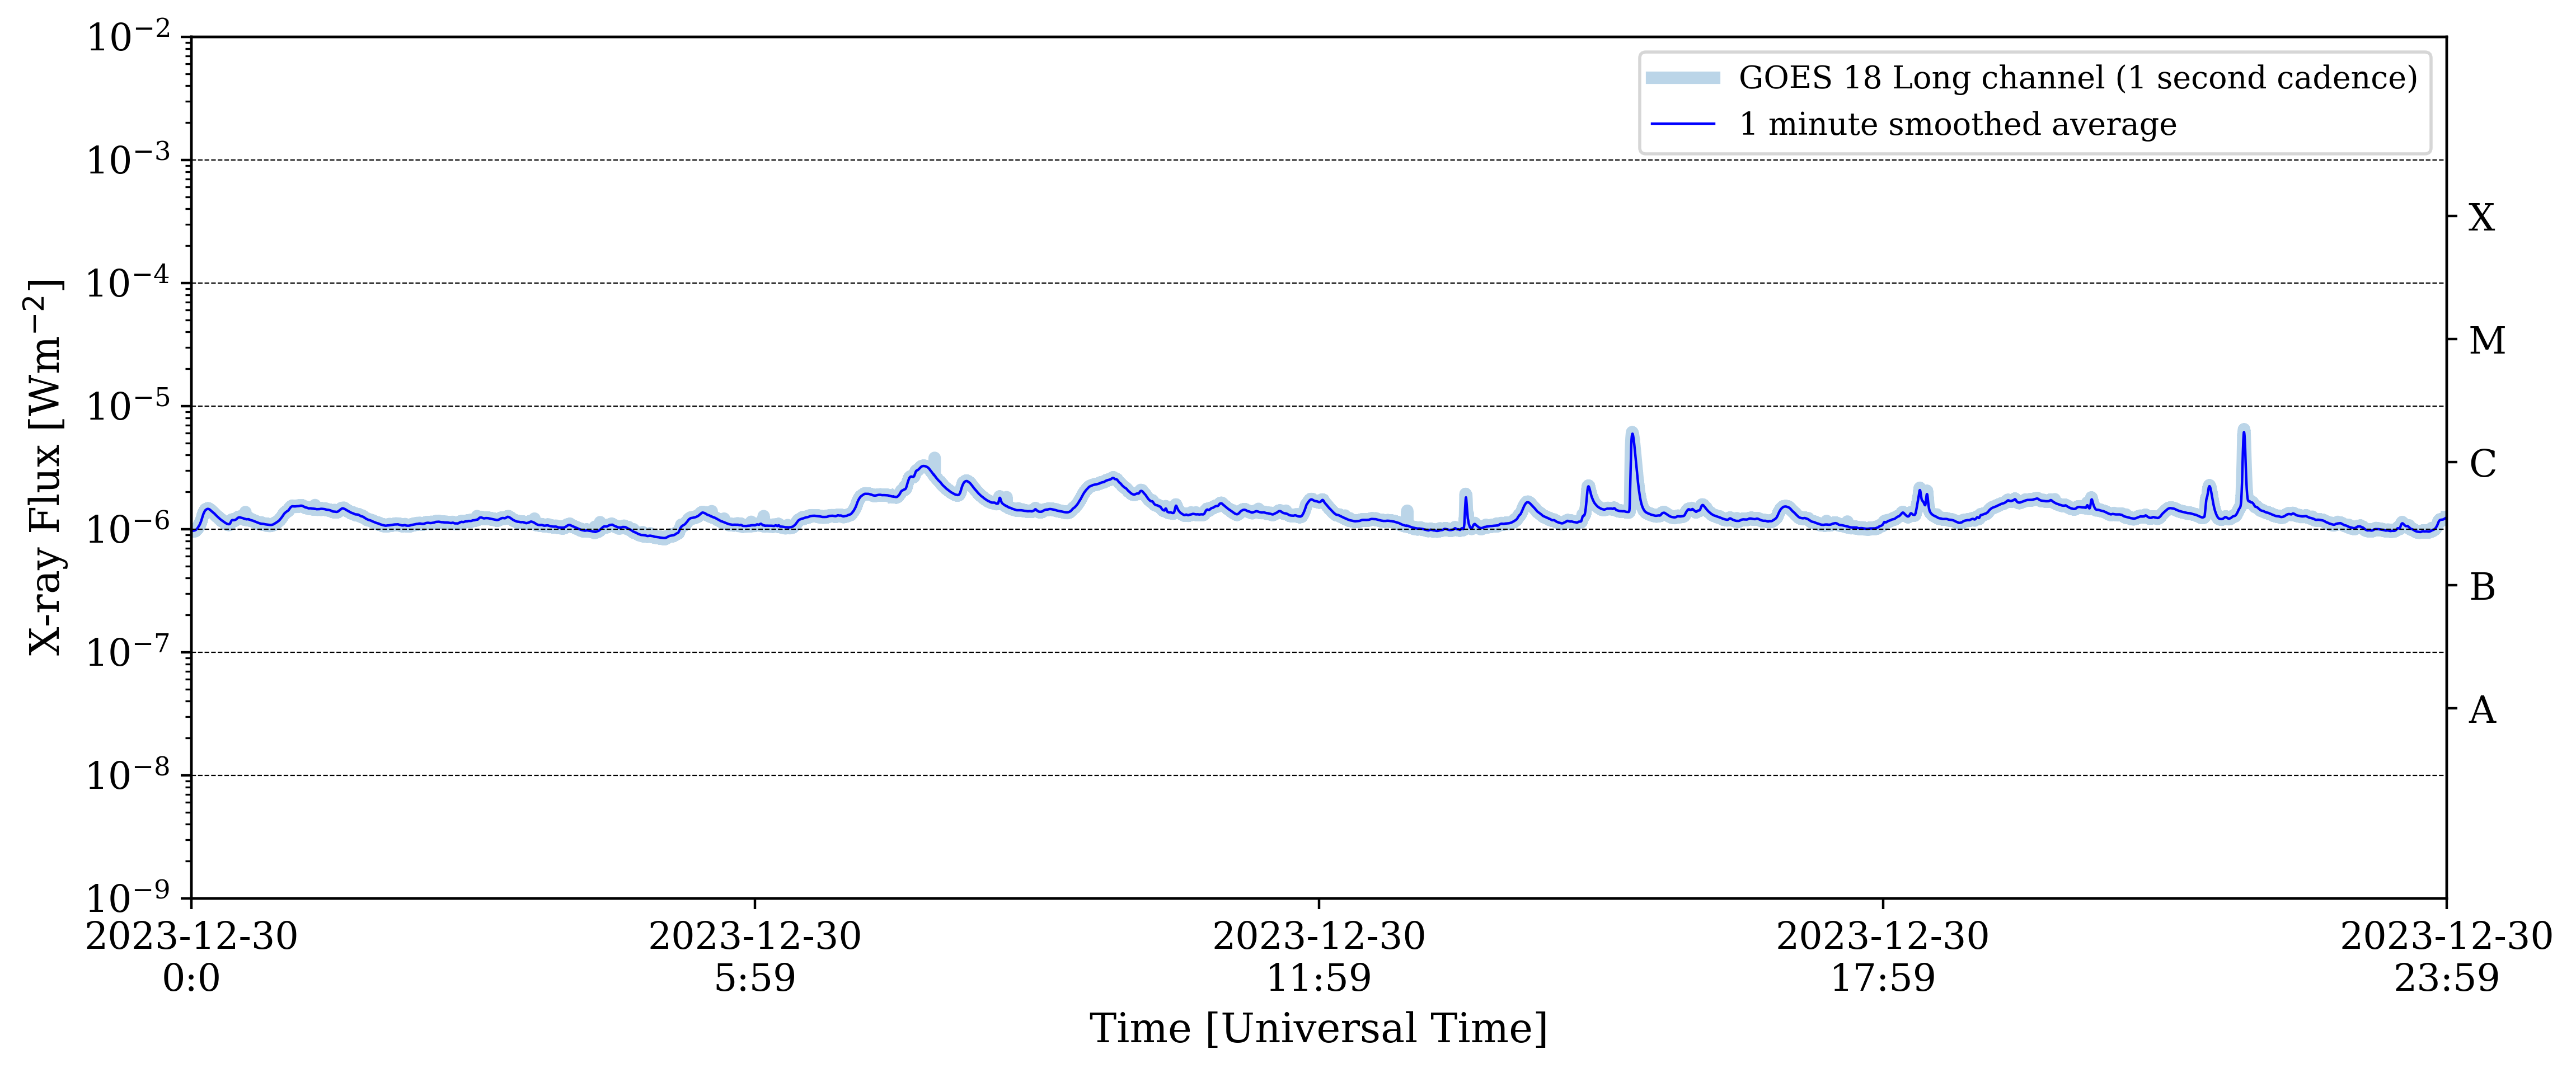

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (13, 5), dpi = 400)

# ax.plot(date_time, df.variables['xrsb_flux'][:], alpha = 0.3, lw = 2, label = 'GOES 18 Long channel (1 second cadence)')
# ax.plot(date_time, pd.Series(df.variables['xrsb_flux'][:]).rolling(60, center = True).mean(), lw = 0.8, color = 'b', label = '1 minute smoothed average')

i = 0

ax.plot(date_time[i], GOES_long[i], alpha = 0.3, lw = 4, label = 'GOES 18 Long channel (1 second cadence)')
ax.plot(date_time[i], pd.Series(GOES_long[i]).rolling(60, center = True).mean(), lw = 0.8, color = 'b', label = '1 minute smoothed average')



ax.axhline(y = 1e-3, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-4, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-5, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-6, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-7, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-8, lw = '0.4', ls = '--', color = 'k')

ax.set()

ax.set_yscale('log')

ax.set_xlim(date_time[i][0], date_time[i][-1])
ax.set_ylim(1e-9, 1e-2)
ax.set_xlabel('Time [Universal Time]')
ax.set_ylabel('X-ray Flux [Wm$^{-2}$]')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

xticks_pos = np.linspace(0, 86399, 5, dtype = int)
ax.set_xticks(date_time[i][xticks_pos])

xticks = []
for j in range(len(xticks_pos)):
    xticks.append(str(date_time[i][xticks_pos][j].year) + '-' + str(date_time[i][xticks_pos][j].month) + '-' + str(date_time[i][xticks_pos][j].day) + 
              '\n' + str(date_time[i][xticks_pos][j].hour) + ':' + str(date_time[i][xticks_pos][j].minute))

ax.set_xticklabels(xticks)


ax1 = ax.twinx()
ax1.set_yscale('log')

ax1.set_ylim(1e-9, 1e-2)

ax1.set_yticks([3.5e-8, 3.5e-7, 3.5e-6, 3.5e-5, 3.5e-4])
ax1.set_yticklabels(['A', 'B', 'C', 'M', 'X'])

ax1.minorticks_off()

ax.legend()
plt.show()

In [19]:
date_time[i][xticks_pos]

masked_array(data=[real_datetime(2023, 12, 30, 0, 0, 0, 314312),
                   real_datetime(2023, 12, 30, 5, 59, 59, 298475),
                   real_datetime(2023, 12, 30, 11, 59, 59, 282135),
                   real_datetime(2023, 12, 30, 17, 59, 59, 266090),
                   real_datetime(2023, 12, 30, 23, 59, 59, 251145)],
             mask=False,
       fill_value='?',
            dtype=object)

#### Plotting the X-ray flux vs time for multiple days (more than one .nc files)

In [8]:
%%time
np.vstack((date_time[0].reshape(len(date_time[0]), 1), date_time[1].reshape(len(date_time[1]), 1),
           date_time[2].reshape(len(date_time[2]), 1), date_time[3].reshape(len(date_time[3]), 1)))

CPU times: total: 15.6 ms
Wall time: 8 ms


masked_array(
  data=[[real_datetime(2023, 12, 30, 0, 0, 0, 314312)],
        [real_datetime(2023, 12, 30, 0, 0, 1, 314312)],
        [real_datetime(2023, 12, 30, 0, 0, 2, 314314)],
        ...,
        [real_datetime(2024, 1, 2, 23, 59, 57, 61849)],
        [real_datetime(2024, 1, 2, 23, 59, 58, 61846)],
        [real_datetime(2024, 1, 2, 23, 59, 59, 61847)]],
  mask=False,
  fill_value='?',
  dtype=object)

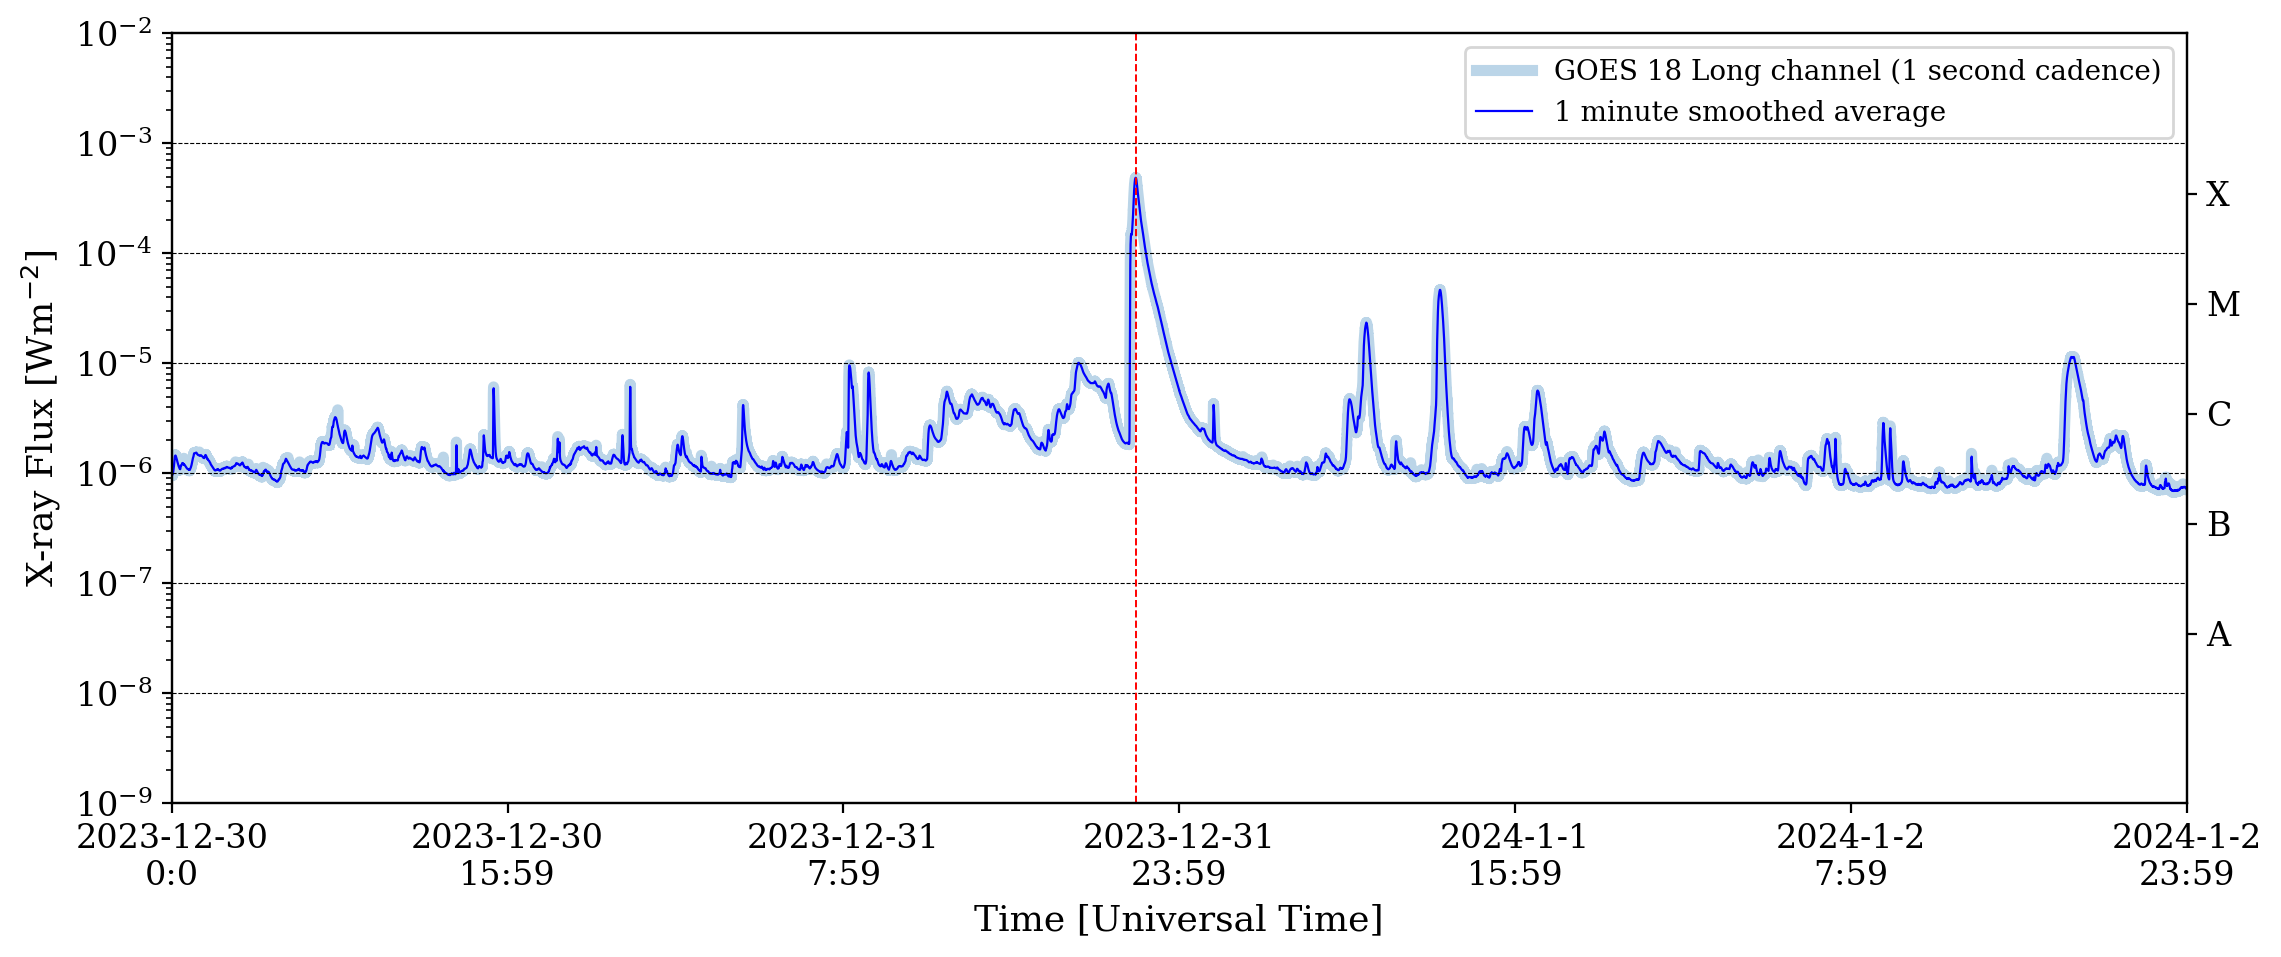

In [33]:
fig, ax = plt.subplots(1, 1, figsize = (13, 5), dpi = 200)

XRSB_time = np.vstack((date_time[0].reshape(len(date_time[0]), 1), date_time[1].reshape(len(date_time[1]), 1),
                  date_time[2].reshape(len(date_time[2]), 1), date_time[3].reshape(len(date_time[3]), 1)))

XRSB_flux = GOES_long[0] + GOES_long[1] + GOES_long[2] + GOES_long[3]

ax.plot(XRSB_time, XRSB_flux, alpha = 0.3, lw = 4, label = 'GOES 18 Long channel (1 second cadence)')
ax.plot(XRSB_time, pd.Series(XRSB_flux).rolling(60, center = True).mean(), lw = 0.8, color = 'b', label = '1 minute smoothed average')



ax.axhline(y = 1e-3, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-4, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-5, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-6, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-7, lw = '0.4', ls = '--', color = 'k')
ax.axhline(y = 1e-8, lw = '0.4', ls = '--', color = 'k')


ax.axvline(date_time[1][GOES_long[1].index(max(GOES_long[1][0 : -1]))], color = 'red', lw = 0.7, ls = '--')


ax.set()

ax.set_yscale('log')

ax.set_xlim(XRSB_time[0], XRSB_time[-1])
ax.set_ylim(1e-9, 1e-2)
ax.set_xlabel('Time [Universal Time]')
ax.set_ylabel('X-ray Flux [Wm$^{-2}$]')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))


xticks_pos = np.linspace(0, len(XRSB_time) - 1, 7, dtype = int)
ax.set_xticks(XRSB_time[xticks_pos].reshape(len(xticks_pos), ))

xticks = []
for j in range(len(xticks_pos)):
    xticks.append(str(XRSB_time[xticks_pos][j][0].year) + '-' + str(XRSB_time[xticks_pos][j][0].month) + '-' + str(XRSB_time[xticks_pos][j][0].day) + 
              '\n' + str(XRSB_time[xticks_pos][j][0].hour) + ':' + str(XRSB_time[xticks_pos][j][0].minute))

ax.set_xticklabels(xticks)



ax1 = ax.twinx()
ax1.set_yscale('log')

ax1.set_ylim(1e-9, 1e-2)

ax1.set_yticks([3.5e-8, 3.5e-7, 3.5e-6, 3.5e-5, 3.5e-4])
ax1.set_yticklabels(['A', 'B', 'C', 'M', 'X'])
ax1.minorticks_off()

ax.legend()

# plt.savefig(main_dir + 'figures/GOES_Long_20231230_20240102.png', dpi = 1000)
plt.show()